In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("./CSVs/wine_data.csv",usecols=[0,1,2],header=None)
df.columns=['Class Label',"Alcohol","Malic Acid"]

In [7]:
df

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

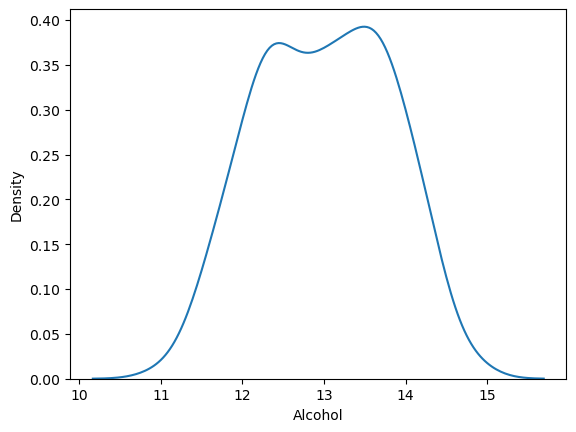

In [15]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Class Label', ylabel='Density'>

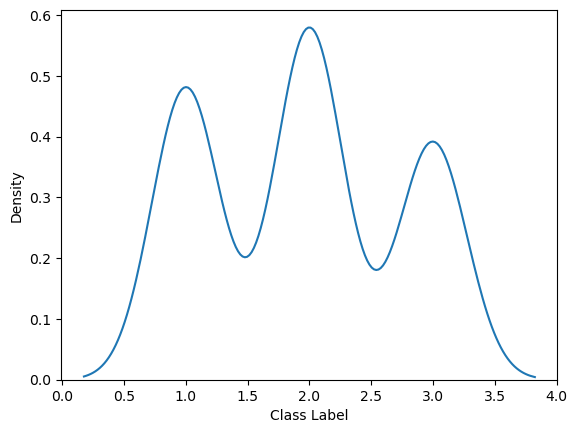

In [9]:
sns.kdeplot(df['Class Label'])

<Axes: xlabel='Malic Acid', ylabel='Alcohol'>

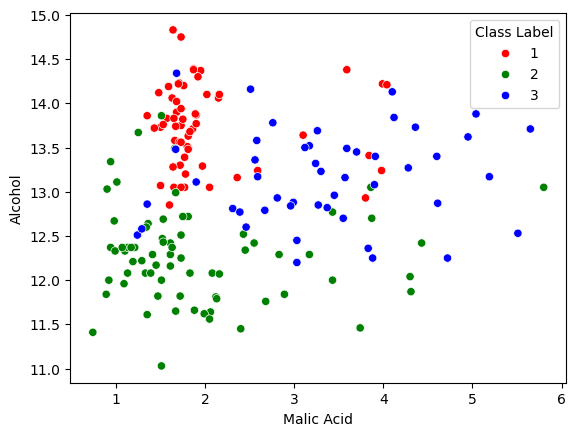

In [20]:
sns.scatterplot(x=df['Malic Acid'],y=df['Alcohol'],hue=df['Class Label'],palette={1:'red',2:'green',3:'blue'})

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(df.drop("Class Label",axis=1),df['Class Label'],test_size=0.2)

In [23]:
x_test.shape,x_train.shape,y_test.shape,y_train.shape

((36, 2), (142, 2), (36,), (142,))

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
minmax=MinMaxScaler()

In [26]:
minmax.fit(x_train)

MinMaxScaler()

In [27]:
x_train_scaler=pd.DataFrame(minmax.transform(x_train),columns=x_train.columns)
x_test_scaler=pd.DataFrame(minmax.transform(x_test),columns=x_train.columns)

In [35]:
np.round(x_train_scaler.describe()),np.round(x_train.describe())

(       Alcohol  Malic Acid
 count    142.0       142.0
 mean       0.0         0.0
 std        0.0         0.0
 min        0.0         0.0
 25%        0.0         0.0
 50%        0.0         0.0
 75%        1.0         0.0
 max        1.0         1.0,
        Alcohol  Malic Acid
 count    142.0       142.0
 mean      13.0         2.0
 std        1.0         1.0
 min       11.0         1.0
 25%       12.0         2.0
 50%       13.0         2.0
 75%       14.0         3.0
 max       15.0         6.0)

Text(0.5, 1.0, 'After Salling')

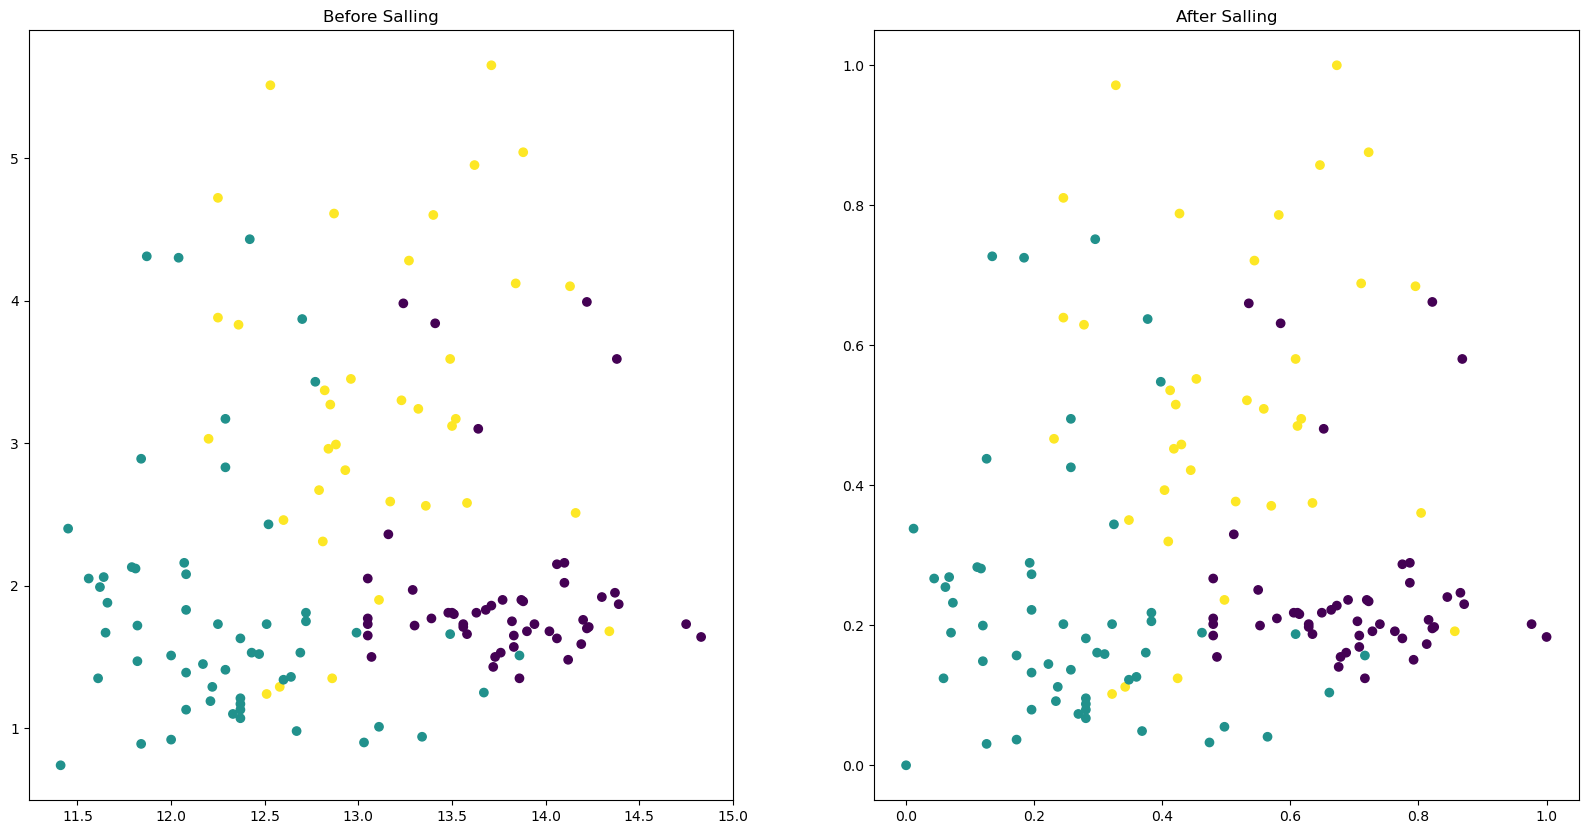

In [42]:
fig,(fig1,fig2)=plt.subplots(ncols=2,figsize=(20,10))

fig1.scatter(x_train["Alcohol"],x_train['Malic Acid'],c=y_train)
fig1.set_title('Before Salling')
fig2.scatter(x_train_scaler["Alcohol"],x_train_scaler['Malic Acid'],c=y_train)
fig2.set_title('After Salling')

<Axes: title={'center': 'After Salling'}, xlabel='Alcohol', ylabel='Density'>

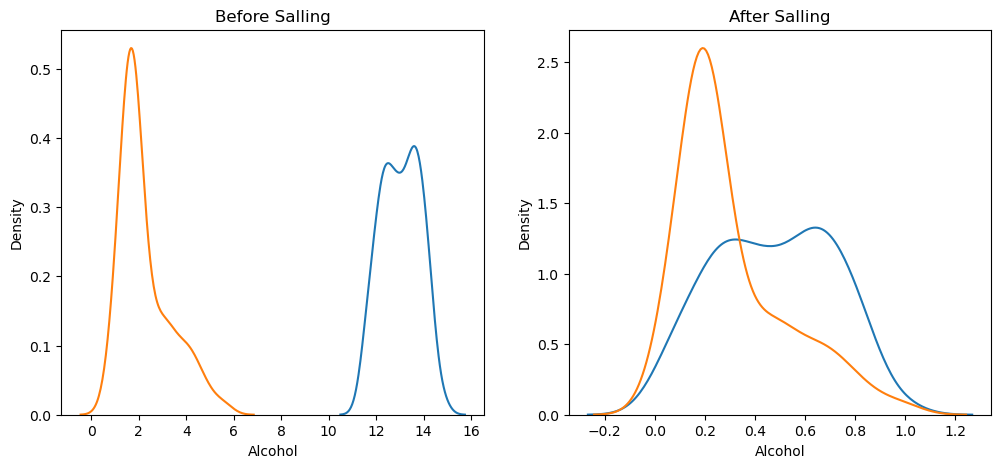

In [45]:
fig,(fig1,fig2)=plt.subplots(ncols=2,figsize=(12,5))


fig1.set_title('Before Salling')
sns.kdeplot(x_train['Alcohol'],ax=fig1)
sns.kdeplot(x_train['Malic Acid'],ax=fig1)

fig2.set_title('After Salling')
sns.kdeplot(x_train_scaler['Alcohol'],ax=fig2)
sns.kdeplot(x_train_scaler['Malic Acid'],ax=fig2)